# Pair Programming EDA III

Objetivos

En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:

📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis.

In [1]:
import pandas as pd
import sidetable
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('../datos/datos_limpiezaII.csv', index_col= 0)
pd.options.display.max_columns=None

In [3]:
plt.rcParams['figure.figsize'] = (12,12)

1. ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

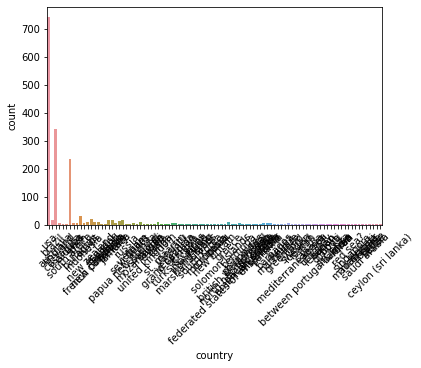

In [4]:
fig = sns.countplot(x= 'country', data = df)
plt.xticks(rotation = 45)

plt.show();

Esta grafica no se puede leer, tiene demasiados paises y resulta confuso. Para evitar esto, nos quedamos con los 10 primeros.

In [5]:
paises = df.stb.freq(['country'])[:10]
paises 

,country,count,percent,cumulative_count,cumulative_percent
0,usa,741,44.746377,741,44.746377
1,australia,341,20.591787,1082,65.338164
2,south africa,233,14.070048,1315,79.408213
3,bahamas,29,1.751208,1344,81.159420
4,new zealand,21,1.268116,1365,82.427536
5,reunion,17,1.026570,1382,83.454106
6,brazil,16,0.966184,1398,84.420290
7,papua new guinea,15,0.905797,1413,85.326087
8,mexico,15,0.905797,1428,86.231884
9,italy,11,0.664251,1439,86.896135


In [6]:
paises['country'].unique()

array(['usa', 'australia', 'south africa', 'bahamas', 'new zealand',
       'reunion', 'brazil', 'papua new guinea', 'mexico', 'italy'],
      dtype=object)

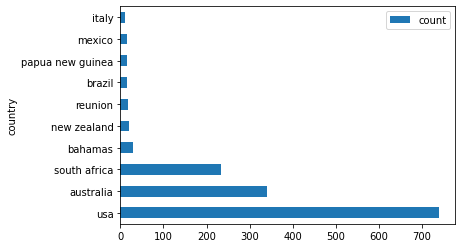

In [7]:
paises.plot.barh(x='country', y = 'count');


2. Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

In [8]:
paises1 = paises['country'].unique()
paises1

array(['usa', 'australia', 'south africa', 'bahamas', 'new zealand',
       'reunion', 'brazil', 'papua new guinea', 'mexico', 'italy'],
      dtype=object)

In [9]:
df10 = df[df['country'].isin(paises1)]
#para encontrar los 10 paises en la tabla principal

In [10]:
order_countries = list(df10["country"].value_counts().index)

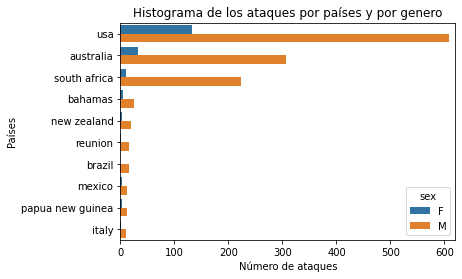

In [11]:
# seleccionamos el countplot 

fig = sns.countplot(y='country', data = df10, hue = 'sex', order = order_countries)

# cambiamos el nombre de los ejes
fig.set(xlabel='Número de ataques', ylabel = 'Países')

# ponemos título a la gráfica
fig.set_title('Histograma de los ataques por países y por genero')

# mostramos la gráfica
plt.xlim(0,620)
plt.show()


Al final decidimos mostrar los resultados con un *countplot* porque nos permite de ordenar los resultados por numero de ataques por paises.

Como podemos ver los hombres son las víctimas principales de ataques de tiburones. Esto, con mucha diferencia.
El patrón se repite en casi todos los paises. En Reunion, Brazil, Italy hay muy pocos ataques (aunque son practicamente inexistentes para las mujeres) En Papua NUeva GUinea es donde menos se aprecia la diferencia por género.

Creemos que afecta los roles de genero, los hombres tienden a exponerse a más situaciones de riesgo que las mujeres por la construcción social de la masculinidad.

3. ¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.

In [12]:
df10["age_numbers"] = df10['age_numbers'].astype("Int64", errors = "raise")

In [13]:
bins = [0,10,20,30,40,50,60,70,80,90]

In [14]:
df10['age_bins'] = pd.cut(df10["age_numbers"], bins)

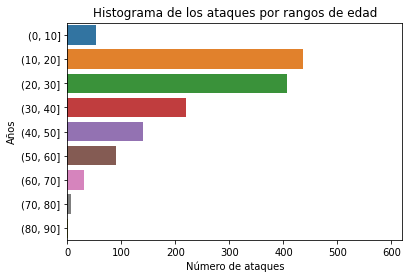

In [15]:
# seleccionamos el countplot 

fig = sns.countplot(y='age_bins', data = df10)

# cambiamos el nombre de los ejes
fig.set(xlabel='Número de ataques', ylabel = 'Años')

# ponemos título a la gráfica
fig.set_title('Histograma de los ataques por rangos de edad')

# mostramos la gráfica
plt.xlim(0,620)
plt.show()


La mayoria de los ataques les suceden a jóvenes con una edad comprendida entre los 18 y los 33 años. Tiene sentido, los jóvenes practican más deportes acuáticos, asumen igualemente más riesgo, etc.

4. Ataques entre sexos, ¿hay diferencia?

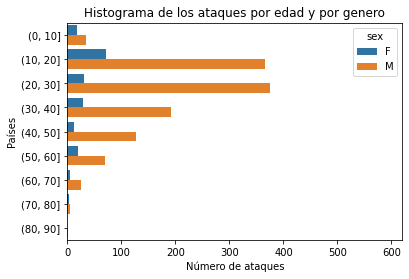

In [16]:
# seleccionamos el countplot 

fig = sns.countplot(y='age_bins', data = df10, hue = 'sex')

# cambiamos el nombre de los ejes
fig.set(xlabel='Número de ataques', ylabel = 'Países')

# ponemos título a la gráfica
fig.set_title('Histograma de los ataques por edad y por genero')

# mostramos la gráfica
plt.xlim(0,620)
plt.show()


Sí que hay diferencia, como decíamos anteriormente.

5. ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

In [17]:
df = pd.read_csv('../datos/datos_limpiezaI.csv', index_col= 0)
pd.options.display.max_columns=None

In [18]:
pd.options.display.max_rows=None

In [19]:
df['mes'].unique()

array(['Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec', 'Nov', 'Oct',
       'Sep', 'Aug', 'Jul', 'May2015', 'ReportedJun', 'ReportedFeb',
       'ReportedMay', nan, 'ReportedDec', 'ReportedJan', 'MidJulJul',
       'MidAug', 'Summer', 'MarMar', 'ReportedAug', 'ReportedSep',
       'Reported', 'ReportedJul', 'ReportedOct', 'ReportedApr', 'June',
       'LateReported', 'LetterJan', 'Ca', 'Circa', 'Before', 'BeforeOct',
       'Between', 'Beforer', 'BeforeJun', 'No', 'NoBefore', 'BeforeFeb',
       'NoBeforeMay', 'NoBeforeMar', 'NoBeforeAug', 'NoBeforeJan',
       'NoAfterAugust', 'BeforeApr', 'BeforeMar', 'During', 'Said',
       'WorldWarII', 'Early', 'BeforeJul', 'NoJul'], dtype=object)

In [20]:
df2 =  df.copy()

In [21]:
#df.loc[df['mes'].str.contains('ay'), 'mes'] = 'May'
#df['mes'].apply(lambda x: 'May' if 'May' in x else x)

In [22]:
df['mes'] = df['mes'].fillna('None')

In [23]:
df['mes'].unique()

array(['Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec', 'Nov', 'Oct',
       'Sep', 'Aug', 'Jul', 'May2015', 'ReportedJun', 'ReportedFeb',
       'ReportedMay', 'None', 'ReportedDec', 'ReportedJan', 'MidJulJul',
       'MidAug', 'Summer', 'MarMar', 'ReportedAug', 'ReportedSep',
       'Reported', 'ReportedJul', 'ReportedOct', 'ReportedApr', 'June',
       'LateReported', 'LetterJan', 'Ca', 'Circa', 'Before', 'BeforeOct',
       'Between', 'Beforer', 'BeforeJun', 'No', 'NoBefore', 'BeforeFeb',
       'NoBeforeMay', 'NoBeforeMar', 'NoBeforeAug', 'NoBeforeJan',
       'NoAfterAugust', 'BeforeApr', 'BeforeMar', 'During', 'Said',
       'WorldWarII', 'Early', 'BeforeJul', 'NoJul'], dtype=object)

Este código habría que limpiarlo:

In [24]:
df.loc[df['mes'].str.contains('Jan'), 'mes'] = 'Jan'

In [25]:
df.loc[df['mes'].str.contains('Feb'), 'mes'] = 'Feb'

In [26]:
df.loc[df['mes'].str.contains('Mar'), 'mes'] = 'Mar'

In [27]:
df.loc[df['mes'].str.contains('Apr'), 'mes'] = 'Apr'

In [28]:
df.loc[df['mes'].str.contains('May'), 'mes'] = 'May' 

In [29]:
df.loc[df['mes'].str.contains('Jun'), 'mes'] = 'Jun'

In [30]:
df.loc[df['mes'].str.contains('Jul'), 'mes'] = 'Jul'

In [31]:
df.loc[df['mes'].str.contains('Aug'), 'mes'] = 'Aug'

In [32]:
df.loc[df['mes'].str.contains('Sep'), 'mes'] = 'Sep'

In [33]:
df.loc[df['mes'].str.contains('Oct'), 'mes'] = 'Oct'

In [34]:
df.loc[df['mes'].str.contains('Nov'), 'mes'] = 'Nov'

In [35]:
df.loc[df['mes'].str.contains('Dec'), 'mes'] = 'Dec'

In [36]:
def cambiar_mes(col): #Nos pasa este código nuestra compañera Ximena
    try:
        if col not in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Dec', 'Nov']:
            return "Unspecified"
        
        else:
            return col

    except:
            return np.nan

In [37]:
df["mes_limpio"] = df["mes"].apply(cambiar_mes) #Aplicamos la función

In [38]:
df['mes_limpio'].unique()

array(['Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec', 'Nov', 'Oct',
       'Sep', 'Aug', 'Jul', 'Unspecified'], dtype=object)

In [39]:
df_mesfinaal = df[df['mes_limpio'] != 'Unspecified']



In [40]:
df_agrupado = df_mesfinaal.groupby('mes_limpio').count().reset_index() #Agrupamos por mes


In [41]:
df_agrupado ['mes_limpio'] = pd.Categorical(df_agrupado['mes_limpio'],
                                   categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Dec', 'Nov'],
                                   ordered=True)

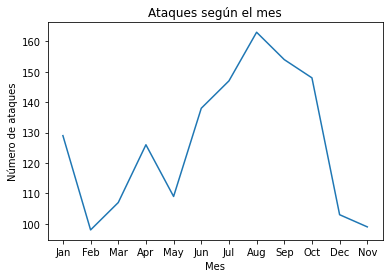

In [42]:
fig = sns.lineplot(x='mes_limpio', y= 'country', data = df_agrupado)

# cambiamos el nombre de los ejes
fig.set(xlabel='Mes', ylabel = 'Número de ataques')

# ponemos título a la gráfica
fig.set_title('Ataques según el mes')

plt.show()

Hay un pico de ataques durante los meses veraniegos. Esto se debe principalmente a la mayor presencia de personas en las zonas costeras debido a las vacaciones estacionales.